In [1]:
import numpy
import sys
import matplotlib.pyplot as plt
%matplotlib inline
# sys.path.append('C://Users/Wian/Documents/BEng(Hons)/CBT/Skogestad-Python')

In [2]:
import utils

In [3]:
def Gd(s):
    G11 = 4.2/(6.2*s + 1)*numpy.exp(-12*s)
    G21 = 15.9/(6.9*s + 1)*numpy.exp(-10.5*s)
    G31 = -0.8655/(7.01*s + 1)*numpy.exp(-0.6*s)
    G12 = 2800*(-0.028952*s - 0.0011)/((7.85*s +1)*(14.63*s + 1))*numpy.exp(-s)
    G22 = 2800*(-0.062784*s - 0.0032)/((7.29*s +1)*(8.94*s + 1))*numpy.exp(-3.44*s)
    G32 = 2.24/(7.76*s + 1)#*numpy.exp(-2.6*s)
    return numpy.matrix([[G11, G12],
                         [G21, G22],
                         [G31, G32]])

In [4]:
Kc = 1
def G(s):
    G11 = 4.29 * numpy.exp(-2.6 * s) / ((6.7 * s + 1))
    G12 = -2.38 * numpy.exp(-3.5 * s) / ((8.64 * s + 1))
    G13 = -2.156 * numpy.exp(-s) / ((9.06 * s + 1))
    G21 = 7.215 * numpy.exp(-6.5 * s) / ((3.25 * s + 1))
    G22 = -9.218 * numpy.exp(-3.0 * s) / ((5.0 * s + 1))
    G23 = -2.156 * numpy.exp(-s) / ((9.06 * s + 1))
    G31 = -0.5635 * numpy.exp(-9.2 * s) / ((8.15 * s + 1))
    G32 =  0.451143 * numpy.exp(-9.4 * s) / ((10.9 * s + 1))
    G33 = 1.1 * (10.1*s + 0.87) * numpy.exp(-s) / ((3.89 * s + 1)*(18.8*s + 1))
    return numpy.diag([Kc, Kc, Kc])*numpy.matrix([[G11, G12, G13],
                         [G21, G22, G23],
                         [G31, G32, G33]])

In [5]:
ks = [4.29, -2.38, -2.156, 7.215, -9.218, -2.156, -0.5635, 0.451143]
taus = [6.7, 8.64, 9.06, 3.25, 5.0, 9.06, 8.15, 10.9]
thetas = [2.65, 3.5, 1, 6.5, 3.0, 1, 9.2, 9.4]

In [6]:
from scipy.optimize import minimize, curve_fit

In [7]:
omega = numpy.logspace(-2, 3, 1000)

In [8]:
def G_P(k, tau, theta, s):
    return k*numpy.exp(-s*theta)/(tau*s + 1)

In [9]:
def Gnom(s):
    return G_P(4.29, 6.7, 2.6, s)

In [10]:
def G_un(k_nom, tau_nom, theta_nom):
    
    def Gnom(s):
        return k_nom*numpy.exp(-s*theta_nom)/(tau_nom*s + 1)
    
    def objective(x, omega):
        k, tau, theta = x
        s = 1j*omega
        return -numpy.abs((G_P(k, tau, theta, s) - Gnom(s))/Gnom(s))
    
    print(objective([k_nom, tau_nom, theta_nom], 0))
    bounds = [[k_nom*(0.98), k_nom*1.02], 
              [tau_nom*(0.90), tau_nom*1.1], 
              [theta_nom*(0.98), theta_nom*1.02]]
    vals = []
    starts = 10
    for omegai in omega:
        best = float('-inf')
        # We will use "multi-start" strategy
        for start in range(starts):
            x0 = [k_nom + numpy.random.uniform(-0.05*k_nom, 0.05*k_nom),
                  tau_nom + numpy.random.uniform(-0.1*tau_nom, 0.1*tau_nom),
                  theta_nom + numpy.random.uniform(-0.02*theta_nom, 0.02*theta_nom)]
            r = minimize(objective, 
                         x0, 
                         args=omegai, 
                         bounds=bounds,
                         method='TNC')  # TNC and L-BFGS-B can handle bounds
            if -r['fun'] > best:
                best = -r['fun']
        vals.append(best)
    
    return vals

In [11]:
i = 0
values = G_un(ks[i], taus[i], thetas[i])

-0.0


In [12]:
def inter(T, k1, k2):
    def w_I(s, T, k1, k2):
            return (T*s + k1)/(T/k2*s + 1)

    plt.loglog(omega, values, label='$l_I$')
    plt.loglog(omega, w_I(omega, T, k1, k2), label = '$w_I$')
    plt.xlabel("Frequency, $\omega$")
    plt.ylabel("Magnitude")
    plt.legend()

In [13]:
from ipywidgets import interact

In [14]:
interact(inter, T = (0.1, 6.), k1 = (0.01, 1.0), k2 = 2.5)

interactive(children=(FloatSlider(value=3.0500000000000003, description='T', max=6.0, min=0.1), FloatSlider(va…

<function __main__.inter(T, k1, k2)>

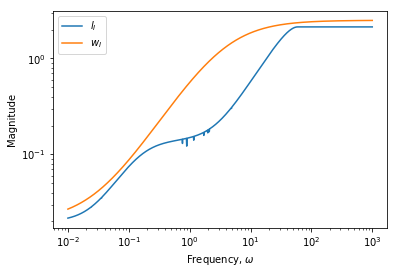

In [15]:
k_nom, tau_nom, theta_nom = ks[1], taus[1], thetas[1]

s = omega*1j

inter(0.7, 0.02, 2.5)
# plt.loglog(omega, numpy.abs((Gnom(s)-G_P(s))/Gnom(s)))

In [16]:
G33 = 1.1 * (10.1*s + 0.87) * numpy.exp(-s) / ((3.89 * s + 1)*(18.8*s + 1))


In [19]:
def Gnom(s):
    return 0.957 * (11.6*s + 1) * numpy.exp(-s) / ((3.89 * s + 1)*(18.8*s + 1))

def G_P(k, tau1, tau2, tau3, theta, s):
    return k*(tau1*s + 1)*numpy.exp(-theta*s)/((tau2*s + 1)*(tau3*s + 1))

def objective(x, omega):
    k, tau1, tau2, tau3, theta = x
    s = 1j*omega
    return -numpy.abs((G_P(k, tau1, tau2, tau3, theta, s) - Gnom(s)))

kn, tau1n, tau2n, tau3n, thetan = [0.957, 11.6, 3.89, 18.8, 1]

bounds = [[kn*(0.98), kn*1.02], 
          [tau1n*(0.90), tau1n*1.1],
          [tau2n*(0.90), tau2n*1.1],
          [tau3n*(0.90), tau3n*1.1],
          [thetan*(0.98), thetan*1.02]]
vals = []
starts = 10
for omegai in omega:
    best = float('-inf')
    # We will use "multi-start" strategy
    for start in range(starts):
        x0 = numpy.random.uniform(2, 3, size=5)
        r = minimize(objective, 
                     x0, 
                     args=omegai, 
                     bounds=bounds,
                     method='TNC')  # TNC and L-BFGS-B can handle bounds
        if -r['fun'] > best:
            best = -r['fun']
    vals.append(best)

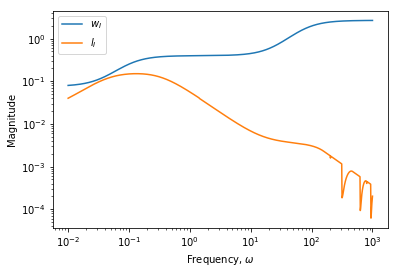

In [20]:
def w_I(s, T1, T2, k1, k2, k3, k4):
            return (T1*s + k1)*(T2*s + k4)/(k2*s + 1)/(k3*s + 1)

Ans,_ = curve_fit(w_I, omega, vals)

plt.loglog(omega, w_I(omega*1j, 0.8, 0.55, 8, 11, 0.015, 0.0095), label="$w_I$")
# plt.loglog(omega, w_I(omega*1j, *Ans))
plt.loglog(omega, vals, label = "$l_I$")
plt.xlabel("Frequency, $\omega$")
plt.ylabel("Magnitude")
plt.legend()

In [24]:
def G_un1(k_nom, tau_nom, theta_nom):
    
    def Gnom(s):
        return k_nom*numpy.exp(-s*theta_nom)/(tau_nom*s + 1)
    
    def objective(x, omega):
        k, tau, theta = x
        s = 1j*omega
        return -numpy.abs((G_P(k, tau, theta, s) - Gnom(s)))
    
    print(objective([k_nom, tau_nom, theta_nom], 0))
    bounds = [[k_nom*(0.98), k_nom*1.02], 
              [tau_nom*(0.90), tau_nom*1.1], 
              [theta_nom*(0.98), theta_nom*1.02]]
    vals = []
    starts = 10
    for omegai in omega:
        best = float('-inf')
        # We will use "multi-start" strategy
        for start in range(starts):
            x0 = [k_nom + numpy.random.uniform(-0.05*k_nom, 0.05*k_nom),
                  tau_nom + numpy.random.uniform(-0.1*tau_nom, 0.1*tau_nom),
                  theta_nom + numpy.random.uniform(-0.02*theta_nom, 0.02*theta_nom)]
            r = minimize(objective, 
                         x0, 
                         args=omegai, 
                         bounds=bounds,
                         method='TNC')  # TNC and L-BFGS-B can handle bounds
            if -r['fun'] > best:
                best = -r['fun']
        vals.append(best)
    
    return vals

In [30]:
Val1 = G_un(ks[i], taus[i], thetas[i])
Val2 = G_un1(ks[i], taus[i], thetas[i])

-0.0
-0.0


Text(0, 0.5, 'Magnitude')

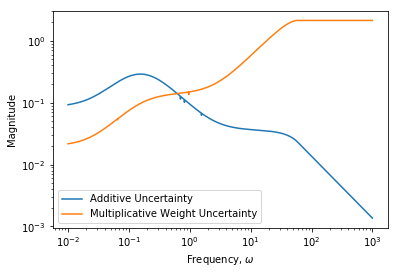

In [34]:
plt.loglog(omega, Val2)
plt.loglog(omega, Val1)
plt.legend(["Additive Uncertainty", "Multiplicative Weight Uncertainty"])
plt.xlabel('Frequency, $\omega$')
plt.ylabel("Magnitude")